In [65]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

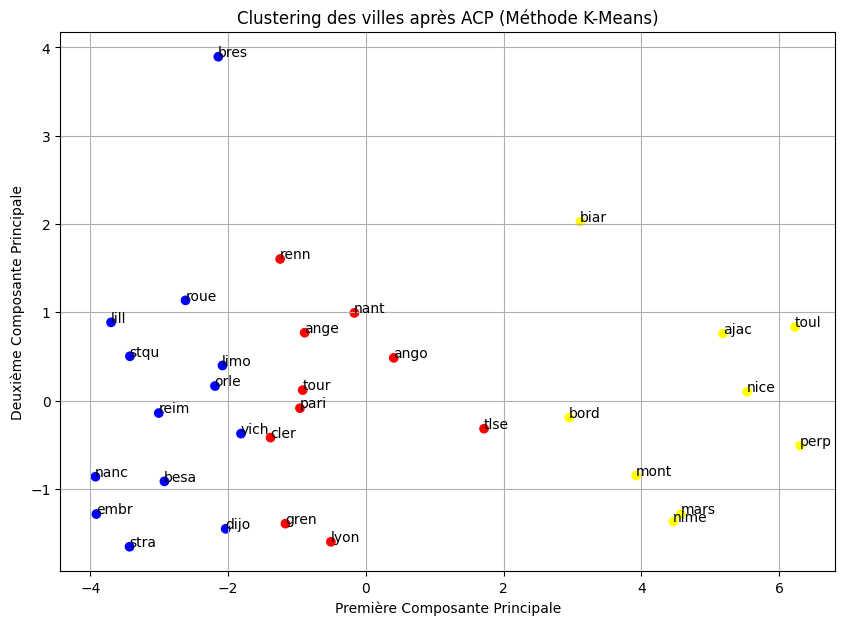

In [66]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings


# Chargement des données depuis le fichier CSV
file_path = './villes.csv' 
data = pd.read_csv(file_path, sep=';')

# Séparation des étiquettes (première colonne) et des données numériques
labels = data.iloc[:, 0].values  # Extraction des noms des villes
X = data.iloc[:, 1:].values  # Extraction des valeurs numériques

# Standardisation des données (centrage-réduction)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'Analyse en Composantes Principales (ACP)
pca = PCA(n_components=2)  # On réduit à 2 dimensions pour la visualisation
X_pca = pca.fit_transform(X_scaled)  # Transformation des données

# Application du clustering K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3)  # Initialisation avec 3 clusters
clustering = kmeans.fit_predict(X_scaled)  # Affectation des clusters aux données

#Couleurs pour chaque cluster
colors = ['red', 'yellow', 'blue']

# Création de la figure
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering,
            cmap=mcolors.ListedColormap(colors))

# Ajout des labels des villes sur le graphique
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

# Titre et axes
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Clustering des villes après ACP (Méthode K-Means)')
plt.grid(True)

# Affichage du graphique
plt.show()
 


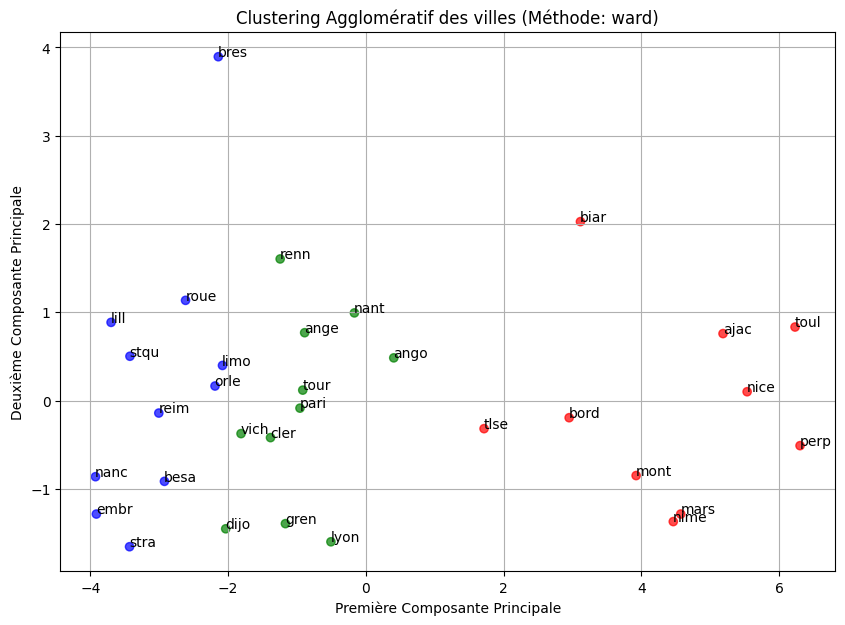

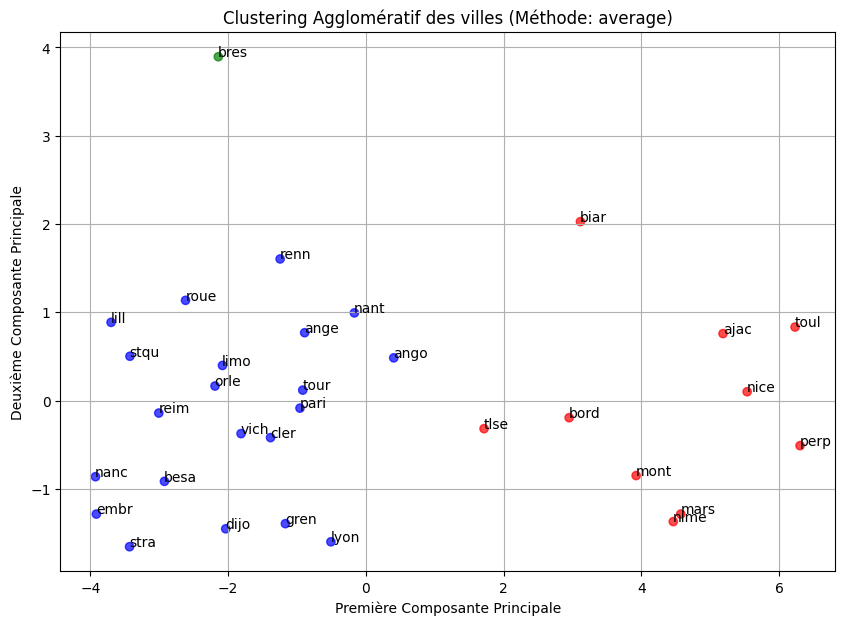

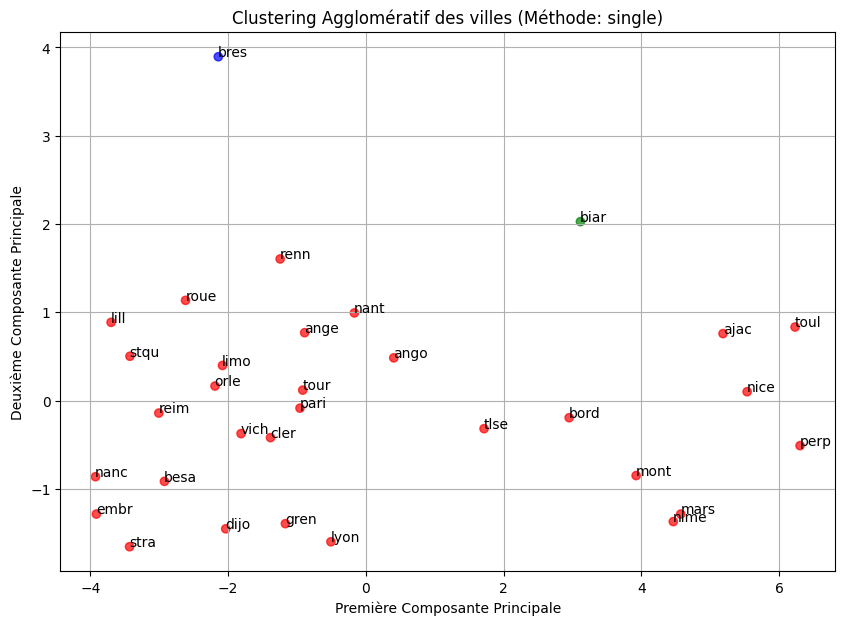

In [67]:

from sklearn.cluster import AgglomerativeClustering
# Chargement des données depuis le fichier CSV
file_path = './villes.csv' 
data = pd.read_csv(file_path, sep=';')

# Séparation des étiquettes (première colonne) et des données numériques
labels = data.iloc[:, 0].values  # Extraction des noms des villes
X = data.iloc[:, 1:].values  # Extraction des valeurs numériques

# Standardisation des données (centrage-réduction)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'Analyse en Composantes Principales (ACP)
pca = PCA(n_components=2)  # On réduit à 2 dimensions pour la visualisation
X_pca = pca.fit_transform(X_scaled)  # Transformation des données

# Liste des méthodes de liaison à tester
linkage_methods = ['ward', 'average', 'single']

# Définition des couleurs pour chaque cluster (maximum 4 couleurs ici)
colors = ['red', 'yellow', 'blue', 'green']

# Boucle sur les différentes méthodes d'agrégation
for method in linkage_methods:
    # Application de la classification hiérarchique avec la méthode actuelle
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    cluster_labels = clustering.fit_predict(X_scaled)  # Attribution des clusters

    # Création du graphique
    plt.figure(figsize=(10, 7))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap=mcolors.ListedColormap(colors), alpha=0.7)

    # Ajout des labels des villes sur le graphique
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

    # Titre du graphique en fonction de la méthode utilisée
    plt.xlabel('Première Composante Principale')
    plt.ylabel('Deuxième Composante Principale')
    plt.title(f'Clustering Agglomératif des villes (Méthode: {method})')
    plt.grid(True)

    # Affichage du graphique
    plt.show() 

Meilleure partition pour KMeans: 2 clusters avec un score de silhouette de 0.6256


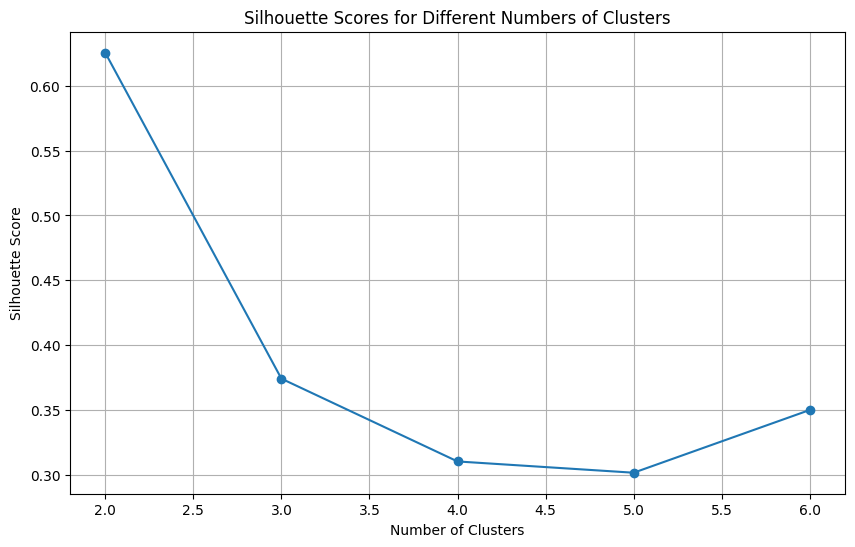

In [68]:
from sklearn.metrics import silhouette_score

# Initialisation des variables pour stocker les meilleurs scores et partitions
best_kmeans_score = -1
best_kmeans_partition = 0
scores = []

# Boucle sur les partitions de 2 à 6 clusters
for n_clusters in range(2, 7):
    # Application de KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    
    # Calcul de l'indice de silhouette
    score = silhouette_score(X_scaled, kmeans_labels)
    scores.append(score)
    
    # Mise à jour des meilleurs scores et partitions
    if score > best_kmeans_score:
        best_kmeans_score = score
        best_kmeans_partition = n_clusters

print(f"Meilleure partition pour KMeans: {best_kmeans_partition} clusters avec un score de silhouette de {best_kmeans_score:.4f}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Question 3
La meilleure partition selon le graphique est la partition à deux classes avec un score de silhouette de 0.6256.

Meilleur nombre de clusters pour AgglomerativeClustering selon l'indice de silhouette :
- ward: 2 clusters
- average: 2 clusters
- single: 5 clusters


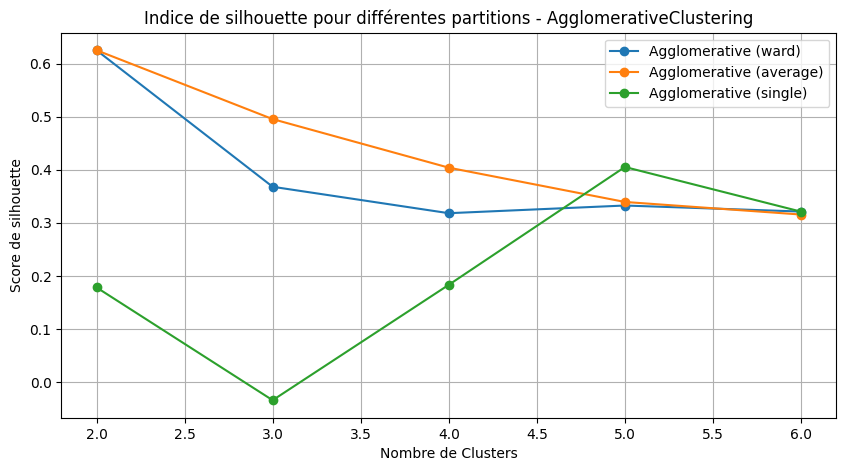

In [69]:
 # Chargement des données
file_path = './villes.csv' 
data = pd.read_csv(file_path, sep=';')

# Séparation des étiquettes (noms des villes) et des données numériques
labels = data.iloc[:, 0].values
X = data.iloc[:, 1:].values  # Toutes les colonnes sauf la première

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialisation des variables pour stocker les scores
k_values = [2, 3, 4, 5, 6]
linkage_methods = ['ward', 'average', 'single']
silhouette_scores_agglomerative = {method: [] for method in linkage_methods}

# Boucle sur les différentes valeurs de clusters
for method in linkage_methods:
    for k in k_values:
        # Appliquer AgglomerativeClustering
        agglo = AgglomerativeClustering(n_clusters=k, linkage=method)
        agglo_labels = agglo.fit_predict(X_scaled)
        silhouette_agglo = silhouette_score(X_scaled, agglo_labels)
        silhouette_scores_agglomerative[method].append(silhouette_agglo)

# Détermination du meilleur nombre de clusters pour chaque méthode
best_k_agglomerative = {method: k_values[np.argmax(silhouette_scores_agglomerative[method])] for method in linkage_methods}

# Affichage des meilleurs clusters pour chaque méthode
print("Meilleur nombre de clusters pour AgglomerativeClustering selon l'indice de silhouette :")
for method, best_k in best_k_agglomerative.items():
    print(f"- {method}: {best_k} clusters")

# Affichage des résultats sous forme de graphique
plt.figure(figsize=(10, 5))
for method in linkage_methods:
    plt.plot(k_values, silhouette_scores_agglomerative[method], marker='o', linestyle='-', label=f'Agglomerative ({method})')

plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de silhouette')
plt.title('Indice de silhouette pour différentes partitions - AgglomerativeClustering')
plt.legend()
plt.grid(True)
plt.show()


# Question 4
Meilleur partition pour AgglomerativeClustering selon l'indice de silhouette :
- ward: 2 clusters
- average: 2 clusters
- single: 5 clusters

# Question 5
Selon le graphique, la meilleure méthode est average avec 3 clusters. 

# Question 6
## Comparaison K-Means vs Agglomerative Clustering
### K-Means
#### Inconvénients :
- Il est possible qu'un groupe se vide en cours des itérations, et que le résultat obtenu ne soit pas optimal.

- Il est nécessaire de fixer k (le nombre de clusters) à l'avance.

#### Avantages :
- Rapide et efficace (converge rapidement).

- Simple à comprendre.

### Agglomerative Clustering
#### Avantages :
- Pas besoin de fixer le nombre de clusters à l'avance.

- Permet d'explorer plusieurs niveaux de regroupement grâce au dendrogramme.

#### Inconvénients :
- Inefficace pour un grand nombre de données (complexité trop élevée).

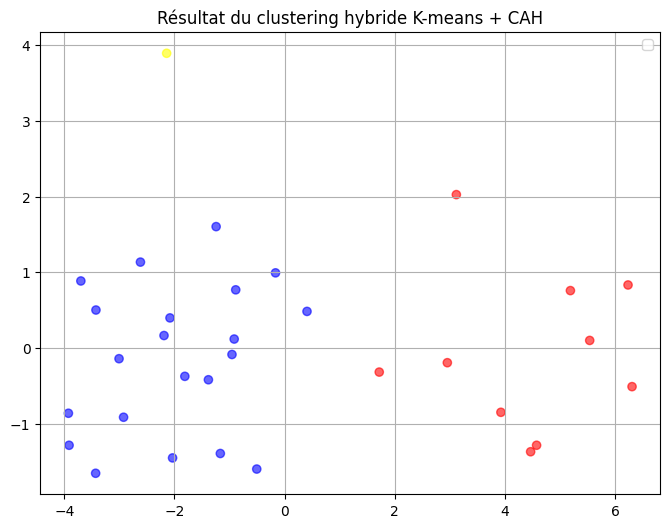

0

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Fonction de clustering hybride combinant K-means et CAH
def hybrid_clustering(file_path, k_initial=10, k_final=3, method="ward"):

    data = pd.read_csv(file_path, sep=';')

    # Séparation des étiquettes (première colonne) et des données numériques
    labels = data.iloc[:, 0].values  # Extraction des noms des villes
    X = data.iloc[:, 1:].values  # Extraction des valeurs numériques


    # Standardisation des données
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)  # On réduit à 2 dimensions pour la visualisation
    X_pca = pca.fit_transform(X_scaled)  # Transformation des données
    
    # Étape 1 : Appliquer K-means avec un nombre élevé de clusters (k_initial)
    kmeans = KMeans(n_clusters=k_initial)
    labels_kmeans = kmeans.fit_predict(X)  # Attribution des clusters aux points
    centers = kmeans.cluster_centers_  # Récupération des centres des clusters
    
    # Étape 2 : Appliquer CAH (Agglomerative Clustering) sur les centres obtenus avec la méthode Ward
    cah = AgglomerativeClustering(n_clusters=k_final, linkage=method)  # Création de l'algorithme CAH
    cah_labels = cah.fit_predict(centers)  # Regroupement des centres K-means en k_final clusters
    final_centers = np.array([centers[cah_labels == i].mean(axis=0) for i in range(k_final)])


    # Visualisation du dendrogramme pour observer la structure des clusters
    """linkage_matrix = linkage(centers, method='ward')  # Matrice de liaison pour le dendrogramme
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix)  # Création du dendrogramme
    plt.title("Dendrogramme de la CAH sur les centres des K-means")
    plt.xlabel("Clusters")
    plt.ylabel("Distance")
    plt.show()"""

    kmeans_final = KMeans(n_clusters=k_final, init=final_centers, n_init=1)
    final_labels = kmeans_final.fit_predict(X)  # Attribution des nouveaux clusters aux données initiales

    # Visualisation du résultat final du clustering
    plt.figure(figsize=(8, 6))
    colors = np.array(["red","blue","yellow"])
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors[final_labels], cmap='viridis', marker='o', alpha=0.6)  # Affichage des points avec leur cluster
    plt.legend()
    plt.title("Résultat du clustering hybride K-means + CAH")
    plt.grid()
    plt.show()
    
    return 0

# Chargement des données depuis le fichier CSV
file_path = './villes.csv' 

# Appliquer la méthode hybride sur les données générées
hybrid_clustering(file_path)



# Question 7
L'approche de la fonction hybride en ward permet de trouver des solutions au problème du choix de partition de manière rapide et donne des résultats affinés. 

Dans notre cas, on peut réduire le temps d'éxecution de la CAH grace à la partition trouvée au premier Kmeans, puis on refait le Kmeans avec 3 centres de gravitépour trouver une partition possible et qui se rapproche de la réalité.

De ce fait, les résultats trouvés peuvent varier en fonction du premier Kmeans, mais la représentation obtenue se raproche de la meilleure CAH obtenue en question 4. En l'occurence, on peut souvent retrouver le même résultat qu'avec la CAH en mode average (pour trouver des résultats différents, relancer la cellule précédente).


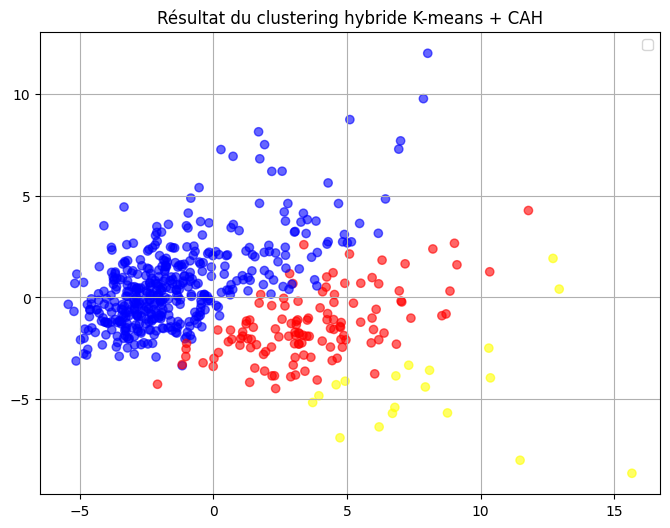

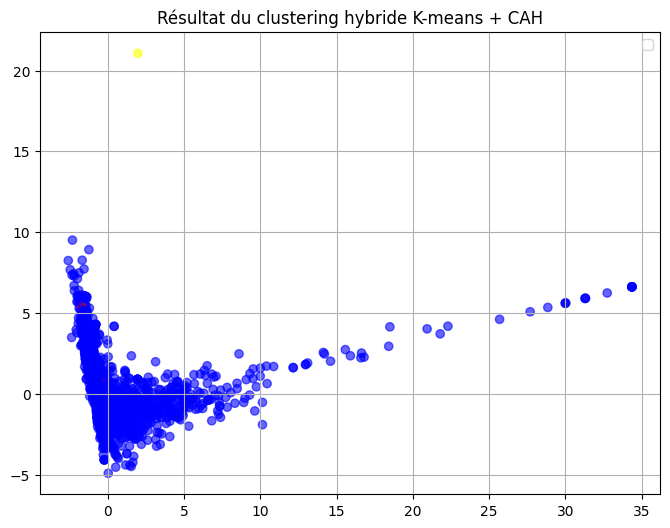

0

In [71]:
hybrid_clustering("./wdbc.csv" )
hybrid_clustering("./spamb.csv" )